# Data Science for Finance Computational Finance
### INDIVIDUAL ASSIGNEMENT, 2023-24
### Student: Edson Thiago Belllas | StudentId: 20231131

#### Consider the following market data for bond yields on several dates available in the file ha_cf_2021.py on Moodle.
#### Tasks:

#### a) Build a pandas DataFrame with the data using the dates as columns and year fractions of the tenors as index

In [1]:
# import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore") 

In [2]:
# import the data from the file previuosly provided
from ha_cf_2021 import *

In [3]:
# uploaded the file in one Dataframe and print some data to check information is uploaded right
pd.DataFrame(tenors)

,0
0,3M
1,6M
2,1Y
3,2Y
4,3Y
5,4Y
6,5Y
7,6Y
8,7Y
9,8Y


In [4]:
# Tenors to fractions
tenors_years_fractions = [int(tenor[:-1])/12 if tenor.endswith('M') else int(tenor[:-1]) for tenor in tenors]
pd.DataFrame(tenors_years_fractions)

,0
0,0.25
1,0.50
2,1.00
3,2.00
4,3.00
5,4.00
6,5.00
7,6.00
8,7.00
9,8.00


In [5]:
data = [[x / 100 for x in sublist] for sublist in data]

In [6]:
# Transpose the data
df = data_transposed = list(map(list, zip(*data)))
df

[[-0.00545, -0.00504, -0.00502, -0.00462, -0.00455],
 [-0.00529, -0.00499, -0.00491, -0.00459, -0.00446],
 [-0.00523, -0.00499, -0.0047599999999999995, -0.00447, -0.00421],
 [-0.00604, -0.00561, -0.00462, -0.00485, -0.0035199999999999997],
 [-0.00471,
  -0.00386,
  -0.00328,
  -0.0034999999999999996,
  -0.0023499999999999997],
 [-0.00436, -0.0032700000000000003, -0.00319, -0.0031, -0.00196],
 [-0.00329, -0.00179, -0.00209, -0.00114, 0.00058],
 [-0.0023699999999999997,
  -0.00097,
  -0.0014199999999999998,
  -0.00053,
  0.0013800000000000002],
 [-0.0011799999999999998,
  0.0007599999999999999,
  0.0002,
  0.0013900000000000002,
  0.0023],
 [-0.0005, 0.00161, 0.00108, 0.00241, 0.00418],
 [0.00013, 0.00222, 0.00167, 0.00307, 0.00485],
 [0.00155, 0.00359, 0.00293, 0.0041199999999999995, 0.0059],
 [0.00505, 0.00718, 0.00639, 0.00777, 0.00851],
 [0.00525, 0.00748, 0.0068200000000000005, 0.00828, 0.01049],
 [0.008539999999999999, 0.01069, 0.01011, 0.01161, 0.01427]]

In [7]:
# Create a DataFrame
df = pd.DataFrame(data_transposed, index=tenors_years_fractions, columns=dates)
df

,09-10-2020,09-09-2020,07-08-2020,09-07-2020,09-06-2020
0.25,-0.00545,-0.00504,-0.00502,-0.00462,-0.00455
0.50,-0.00529,-0.00499,-0.00491,-0.00459,-0.00446
1.00,-0.00523,-0.00499,-0.00476,-0.00447,-0.00421
2.00,-0.00604,-0.00561,-0.00462,-0.00485,-0.00352
3.00,-0.00471,-0.00386,-0.00328,-0.00350,-0.00235
4.00,-0.00436,-0.00327,-0.00319,-0.00310,-0.00196
5.00,-0.00329,-0.00179,-0.00209,-0.00114,0.00058
6.00,-0.00237,-0.00097,-0.00142,-0.00053,0.00138
7.00,-0.00118,0.00076,0.00020,0.00139,0.00230
8.00,-0.00050,0.00161,0.00108,0.00241,0.00418


#### b) Plot the yield curve for each date

In [8]:
df.columns[:]

Index(['09-10-2020', '09-09-2020', '07-08-2020', '09-07-2020', '09-06-2020'], dtype='object')

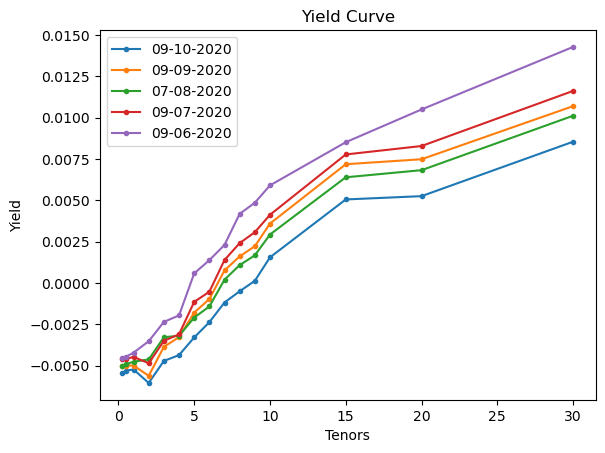

In [9]:
# Plot the yield curves
for date in dates:
    plt.plot(tenors_years_fractions, df[date], label=date, marker='.')

# Add labels and legend
plt.xlabel('Tenors')
plt.ylabel('Yield')
plt.title('Yield Curve')
plt.legend()
plt.show()

#### c) Estimate the NSS parameters for each date

In [10]:
from scipy.optimize import minimize

# Calculate NSS parameters
def NSS_parameters(data):
    
    def NSS_Curve(params):
        beta0, beta1, beta2, beta3, tau1, tau2 = params
        maturities = np.array(tenors_years_fractions)
        return np.sum((data - (beta0 + (beta1 * (1 - np.exp(-maturities / tau1)) / (maturities / tau1)) + beta2 * ((1 - np.exp(-maturities / tau1)) / (maturities / tau1) - np.exp(-maturities / tau1)) / (maturities / tau1) + beta3 * ((1 - np.exp(-maturities / tau2)) / (maturities / tau2) - np.exp(-maturities / tau2)) / (maturities / tau2)))**2)

    x0 = np.array([0, 0, 0, 0, 1, 1])  # beta0, beta1, beta2, beta3, tau1, tau2
    result = minimize(NSS_Curve, x0, method='BFGS')
    return result.x

result = []

for i, date in enumerate(dates):
    parameters = NSS_parameters(data[i])
    result.append([date] + list(parameters))

df_nss = pd.DataFrame(result, columns=['Data', 'Beta0', 'Beta1', 'Beta2', 'Beta3', 'Tau1', 'Tau2'])
df_nss

,Data,Beta0,Beta1,Beta2,Beta3,Tau1,Tau2
0,09-10-2020,0.013221,-0.172795,0.167587,0.141079,0.947474,1.451507
1,09-09-2020,0.015220,-0.163768,0.155940,0.131952,0.956371,1.354019
2,07-08-2020,0.014957,-0.180147,0.172031,0.147789,0.938197,1.460068
3,09-07-2020,0.016318,-0.170993,0.164939,0.136010,0.955687,1.373714
4,09-06-2020,0.018967,-0.188964,0.181365,0.149124,0.944518,1.411107


#### d) Plot the NSS Yield Curve for each date

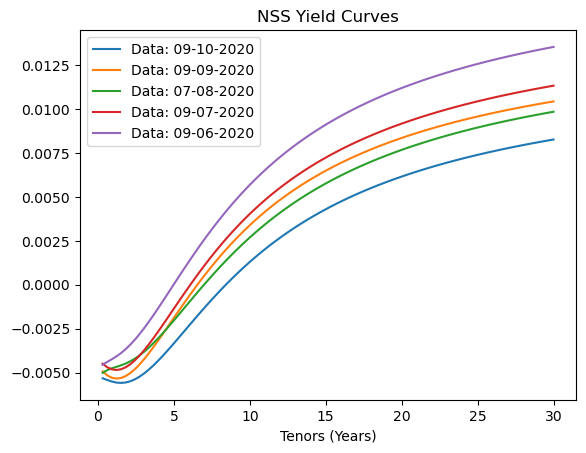

In [11]:
def plot_nss_yield_curve(date, beta0, beta1, beta2, beta3, tau1, tau2):
    
    t_values = np.linspace(0, max(tenors_years_fractions), 100)  # Smoothing the curve
    y_values = beta0 + (beta1 * (1 - np.exp(-t_values / tau1)) / (t_values / tau1)) + beta2 * ((1 - np.exp(-t_values / tau1)) / (t_values / tau1) - np.exp(-t_values / tau1)) / (t_values / tau1) + beta3 * ((1 - np.exp(-t_values / tau2)) / (t_values / tau2) - np.exp(-t_values / tau2)) / (t_values / tau2)
    
    plt.plot(t_values, y_values, label=f'Data: {date}')

# ploting
plt.figure()  
for i in range(len(dates)):
    plot_nss_yield_curve(df_nss['Data'][i], df_nss['Beta0'][i], df_nss['Beta1'][i], df_nss['Beta2'][i], df_nss['Beta3'][i], df_nss['Tau1'][i], df_nss['Tau2'][i])

plt.title('NSS Yield Curves')
plt.xlabel('Tenors (Years)')
plt.legend()
plt.show()


#### e) Plot the evolution of the 9M, 3.5Y, 12.5Y and the 25Y rate over the curve dates (a line for each tenor)

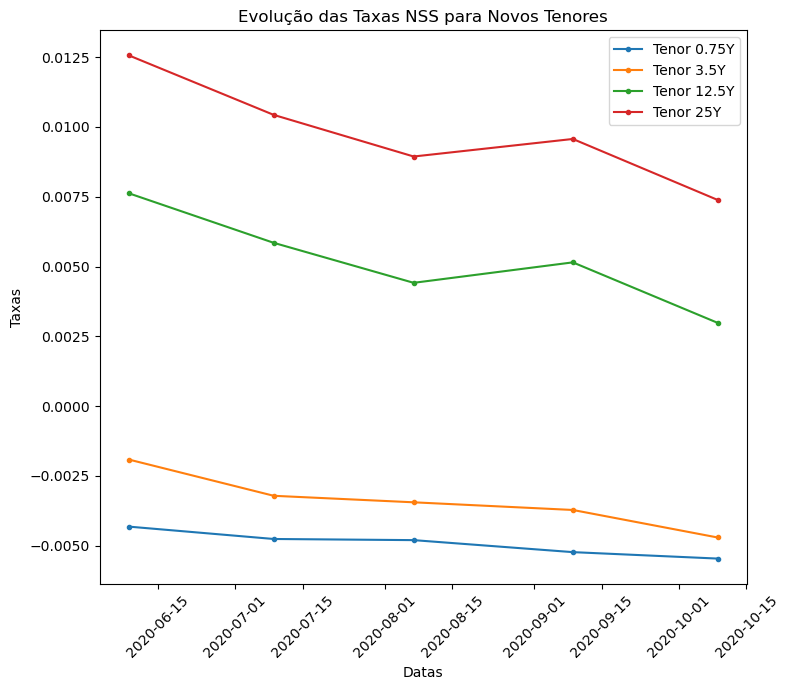

In [32]:
# upload new tenors
new_tenors = [0.75, 3.5, 12.5, 25]

# Func NSS paramters rate
def calculate_NSS_rate(parameters, tenor):
    beta0, beta1, beta2, beta3, tau1, tau2 = parameters
    maturities = np.array(tenor)
    return beta0 + (beta1 * (1 - np.exp(-maturities / tau1)) / (maturities / tau1)) + beta2 * ((1 - np.exp(-maturities / tau1)) / (maturities / tau1) - np.exp(-maturities / tau1)) / (maturities / tau1) + beta3 * ((1 - np.exp(-maturities / tau2)) / (maturities / tau2) - np.exp(-maturities / tau2)) / (maturities / tau2)

# NSS rate to new tenors
nss_rates_new = []

for i, date in enumerate(dates):
    parameters = df_nss.iloc[i, 1:].values  # Obtendo os parâmetros para a data atual
    nss_rates = [calculate_NSS_rate(parameters, tenor) for tenor in new_tenors]
    nss_rates_new.append([date] + nss_rates)

df_nss_rates_new['Data'] = pd.to_datetime(df_nss_rates_new['Data'], format='%d-%m-%Y')
df_nss_rates_new = df_nss_rates_new.sort_values(by='Data')

# Ploting
plt.figure(figsize=(8, 7))

for tenor in new_tenors:
    plt.plot(df_nss_rates_new['Data'], df_nss_rates_new[f'Tenor {tenor}Y'], label=f'Tenor {tenor}Y', marker='.')

plt.title('Evolução das Taxas NSS para Novos Tenores')
plt.xlabel('Datas')
plt.ylabel('Taxas')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()


#### f) Plot the market data points vs the NSS fit for each date using 5 subplots sharing the y axis (One market date in each subplot)

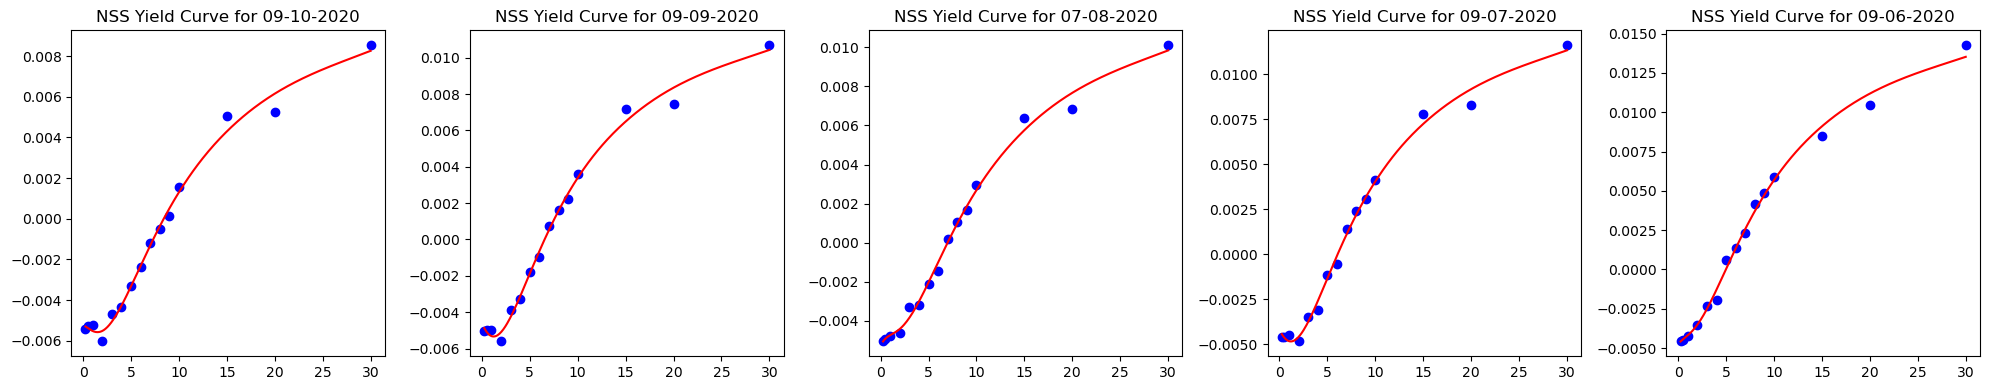

In [42]:
from scipy.interpolate import make_interp_spline # Lib to smoothing the curves

fig, axs = plt.subplots(1, len(dates), figsize=(20, 4))

for i, date in enumerate(dates):
    parameters = NSS_parameters(data[i])
   
    # run the NSS curves using the estimated parameters
    maturities = np.array(tenors_years_fractions)
    NSS_Curve = parameters[0] + (parameters[1] * (1 - np.exp(-maturities / parameters[4])) / (maturities / parameters[4])) + parameters[2] * ((1 - np.exp(-maturities / parameters[4])) / (maturities / parameters[4]) - np.exp(-maturities / parameters[4])) / (maturities / parameters[4]) + parameters[3] * ((1 - np.exp(-maturities / parameters[5])) / (maturities / parameters[5]) - np.exp(-maturities / parameters[5])) / (maturities / parameters[5])
    
    # Smoothing the nss curve
    maturities_smooth = np.linspace(min(maturities), max(maturities), 300)
    spl = make_interp_spline(maturities, NSS_Curve, k=3)
    NSS_Curve_smooth = spl(maturities_smooth)
    
    # set axy
    ax = axs[i]
    
    # Plotar os dados originais e a curva NSS suavizada
    ax.plot(maturities, data[i], 'bo', label='Yield')
    ax.plot(maturities_smooth, NSS_Curve_smooth, 'r-', label='NSS Curve Projection (Smoothed)')
    ax.set_title(f'NSS Yield Curve for {date}')


# layout adjust
plt.tight_layout()

# ploting
plt.show()


#### g) Make a function that will give the daycount fraction between two dates for either convention Act/360 or Act/365 using date strings as inputs. Example: dayCount('15-06-2020', '15-12-2021', 'Act/360')

In [34]:
from dateutil import relativedelta
from datetime import datetime

def dateDiff():
    
    start_date_str = input('Insert the start date (format DD-MM-YYYY): ')
    end_date_str = input('Insert the end date (format DD-MM-YYYY): ')
    
    if len(start_date_str) != 10 or len(end_date_str) != 10:
        print("Date format error")
    else:
        convention = int(input('Set 1: Act/360 or 2: Act/365: '))
    
    if convention == 1:
        convention_print = 'Act/360'
    elif convention == 2:
        convention_print = 'Act/365'
    else:
        raise ValueError("Convenção inválida. Escolha 'Act/360' ou 'Act/365'.")
        

    start_date = datetime.strptime(start_date_str, '%d-%m-%Y').date()
    end_date = datetime.strptime(end_date_str, '%d-%m-%Y').date()

    delta = relativedelta.relativedelta(end_date, start_date)

    if convention == 1:
        days = delta.years * 360 + delta.months * 30 + delta.days
    elif convention == 2:
        days = delta.years * 365 + delta.months * 30 + delta.days
    else:
        raise ValueError("Convenção inválida. Escolha 'Act/360' ou 'Act/365'.")
        
    if days == 1:
        print(f"A fração de dias entre {start_date} e {end_date} com a convenção {convention_print} é {days} dia.")
    else:
        print(f"A fração de dias entre {start_date} e {end_date} com a convenção {convention_print} é {days} dias.")

In [ ]:
dateDiff()

#### h) Make a function that not only returns the present value of a future investment for a given rate but also prints a custom string. Use it to determine the present value of a payment of EUR 2,430.04 in 5 years at the rate of 5% (Annual compounded rate) and print whatever string you want. Example: pv(amount, rate, maturity, text)

In [41]:
def pv(amount, rate, maturity, text):
    present_value = amount / ((1 + rate)**maturity)
    print(f"The present value of {amount} EUR in {maturity} years at a rate of {rate*100}% is {present_value:.2f} EUR.")


amount = 2430.04
rate = 0.05
maturity = 5
custom_text = "This is a custom message."

pv(amount, rate, maturity, custom_text)


The present value of 2430.04 EUR in 5 years at a rate of 5.0% is 1904.00 EUR.


PROJECT MILESTONES/REPORTS
The commented code (jupyter notebook or python script) should be submitted no later than
November 2nd, 2023 via Moodle or by email to dduarte@novaims.unl.pt.